# Assignment 6 
## PHYS 512 

- sorry this week's assignment's really messy , super busy week plus tough assignment :')

### Functions for reading data, creating windows etc

In [458]:
import os 
# point to correct directory
os.chdir(r'C:\Users\Michelle\Documents\Git\PHYS_512\phys512_hw\problem_sets\ps6\LOSC_Event_tutorial')

# read json files for filenames
def read_json(eventname):
    event = events[eventname]
    fn_H1 = event['fn_H1'] 
    fn_L1 = event['fn_L1']
    fn_template = event['fn_template']
    fs = event['fs']
    tevent = event['tevent']
    fband = event['fband']
    return fn_H1, fn_L1, fn_template, fs, tevent, fband

# read template files
def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    th=template[0]
    tl=template[1]
    return th,tl  # templates

# get strain
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

# taken from class except for blackman part
def make_flat_window(n,m):
    #tmp=make_window(m)
    tmp = np.blackman(m)
    win=np.ones(n)
    mm=m//2
    win[:mm]=tmp[:mm]
    win[-mm:]=tmp[-mm:]
    return win

### Read the GW/event files:

In [459]:
import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
import os 


json_file = 'BBH_events_v3.json'
events = json.load(open(json_file ,'r'))

# Choose event name:
eventnames = ['GW150914', 'LVT151012', 'GW151226', 'GW170104']
nevents = len(eventnames)

# hold files
hold_strain_H, hold_utc_H = [],[] #np.array([]),np.array([])
hold_strain_L, hold_utc_L = [],[] #np.array([]),np.array([])
hold_t_h, hold_t_l = [],[] #np.array([]),np.array([])

# for loop to go through all events
for i in range(nevents):
    fn_H1, fn_L1, fn_template, fs, tevent, fband = read_json(eventnames[i]) # fs is the same for each event
    
    print('reading Hanford file:',fn_H1) # Hanford detector
    strain_H,dt_H,utc_H=read_file(fn_H1)
    print('reading Livingston file:',fn_L1) # Livingston detector
    strain_L,dt_L,utc_L=read_file(fn_L1)
    print('reading its template ',fn_template) # template for both detectors
    t_h,t_l=read_template(fn_template)

    hold_strain_H.append(strain_H) #= np.append(hold_strain_H,strain_H)
    hold_utc_H.append(utc_H) #= np.append(hold_utc_H,utc_H)
    hold_strain_L.append(strain_L) #= np.append(hold_strain_L,strain_L)
    hold_utc_L.append(utc_L) #= np.append(hold_utc_L,utc_L)
    hold_t_h.append(t_h) #= np.append(hold_t_h, t_h)
    hold_t_l.append(t_l) #= np.append(hold_t_l, t_l)
    

reading Hanford file: H-H1_LOSC_4_V2-1126259446-32.hdf5
reading Livingston file: L-L1_LOSC_4_V2-1126259446-32.hdf5
reading its template  GW150914_4_template.hdf5
reading Hanford file: H-H1_LOSC_4_V2-1128678884-32.hdf5
reading Livingston file: L-L1_LOSC_4_V2-1128678884-32.hdf5
reading its template  LVT151012_4_template.hdf5
reading Hanford file: H-H1_LOSC_4_V2-1135136334-32.hdf5
reading Livingston file: L-L1_LOSC_4_V2-1135136334-32.hdf5
reading its template  GW151226_4_template.hdf5
reading Hanford file: H-H1_LOSC_4_V1-1167559920-32.hdf5
reading Livingston file: L-L1_LOSC_4_V1-1167559920-32.hdf5
reading its template  GW170104_4_template.hdf5


### plotting raw strain data:

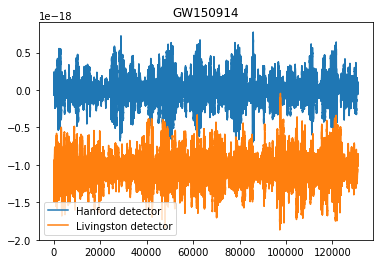

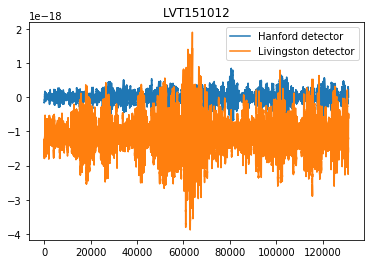

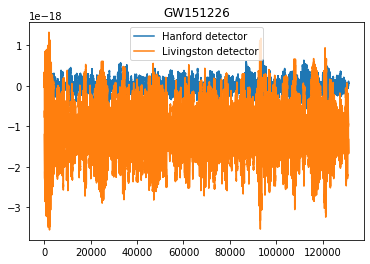

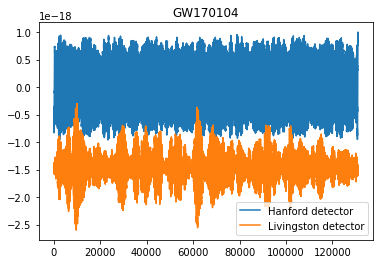

In [448]:
for i in range(nevents):
    plt.plot(hold_strain_H[i], label = 'Hanford detector')
    plt.plot(hold_strain_L[i], label = 'Livingston detector')
    plt.legend()
    plt.title(eventnames[i])
    plt.show()

### Using simple noise model from class (starting point):

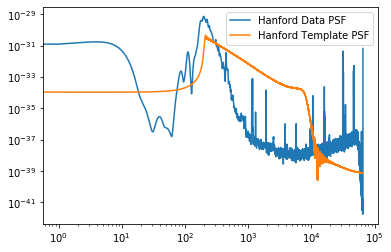

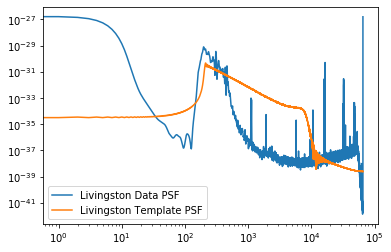

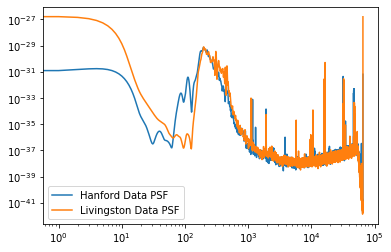

In [449]:
#PSF with simple noise model - moving average & flat cosine window

n = len(hold_strain_H[0])
win=make_flat_window(n,n//3)

i = 0
strainH = hold_strain_H[i]
strainL = hold_strain_L[i]
th = hold_t_h[i]
tl = hold_t_l[i] 

sft_H=np.fft.rfft(win*strainH)
sft_L=np.fft.rfft(win*strainL)
Nft_H=np.abs(sft_H)**2 # PSF
Nft_L=np.abs(sft_L)**2 # PSF

for i in range(15):
    Nft_H=(Nft_H+np.roll(Nft_H,1)+np.roll(Nft_H,-1))/3
    Nft_L=(Nft_L+np.roll(Nft_L,1)+np.roll(Nft_L,-1))/3

plt.loglog(Nft_H, label ='Hanford Data PSF')
plt.loglog(np.abs(np.fft.rfft(th))**2, label = 'Hanford Template PSF')
plt.legend()
plt.show(block=True)

plt.loglog(Nft_L, label ='Livingston Data PSF')
plt.loglog(np.abs(np.fft.rfft(tl))**2, label = 'Livingston Template PSF')
plt.legend()
plt.show(block=True)

plt.loglog(Nft_H, label ='Hanford Data PSF')
plt.loglog(Nft_L, label ='Livingston Data PSF')
plt.legend()
plt.show()


## Part A: Noise model

- We want to improve our noise model:
#### Window: 
- a flat window function that gradually tapers off will make sure the data chunk we're taking isn't modulated in some way and we don't want to take a rectangle function because that will result in ringing. Hence we will take a blackman window function and cut in half, and fill the middle section with an array of ones - to create a flat window that has a gradual drop off at the sides
#### Averaging:
- For the averaging to make our PSF less noisy , we will use  a gaussian filter

(didn't deal with any lines)

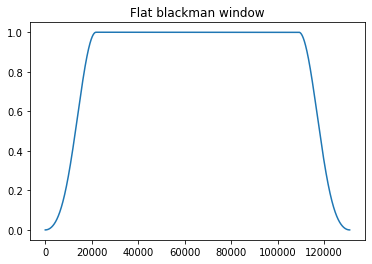

In [450]:
# Flat blackman window function
plt.plot(win)
plt.title('Flat blackman window')
plt.show()

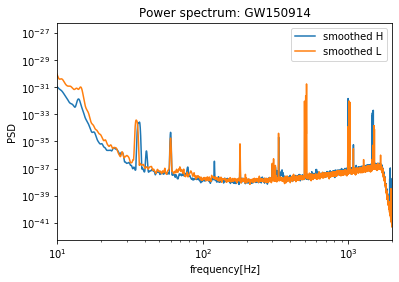

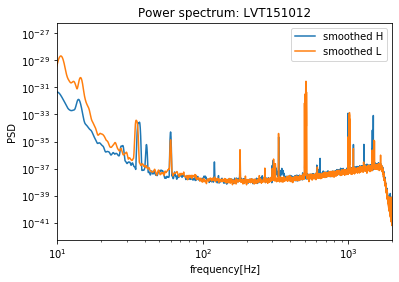

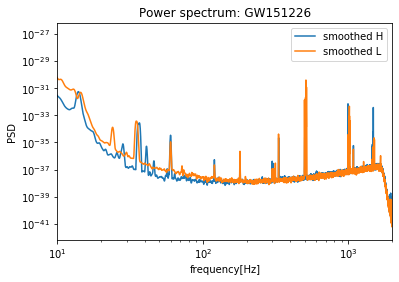

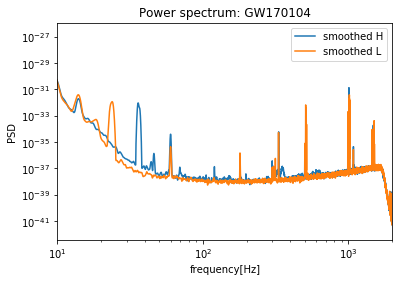

In [451]:
from scipy.ndimage import gaussian_filter as gauss

#  h=np.fft.irfft(np.fft.rfft(f)*np.fft.rfft(g),len(array))
# get frequency for x axis, from sampling time
fft_freq = (np.fft.rfftfreq(len(hold_strain_H[0]), dt_H))

list_Nft_smoothH,list_Nft_smoothL = [], [] 

for i in range(len(eventnames)):
    sft_H = np.fft.rfft(hold_strain_H[i]*win) # fft(strain H)
    sft_L = np.fft.rfft(hold_strain_L[i]*win) # fft(strain H)
    Nft_H_og=np.abs(sft_H)**2 # PSD
    Nft_L_og=np.abs(sft_L)**2 # PSD
    
    # hold smooth PSDs
    list_Nft_smoothH.append(gauss(Nft_H_og, 10))
    list_Nft_smoothL.append(gauss(Nft_L_og, 10))
    #nsmooth = 6
    # tried to convolve with blackman instead of gaussian , didn't do as well 
    #list_Nft_smoothH.append(gauss(np.convolve(Nft_H_og, np.blackman(nsmooth), mode = 'same'),20))
    #list_Nft_smoothL.append(gauss(np.convolve(Nft_L_og, np.blackman(nsmooth), mode = 'same'),20))

    plt.loglog(fft_freq,list_Nft_smoothH[i], label = 'smoothed H')
    plt.loglog(fft_freq,list_Nft_smoothL[i], label = 'smoothed L')
    plt.xlim(10, 2e3)
    plt.legend()
    plt.title('Power spectrum: '+eventnames[i])
    plt.ylabel('PSD')
    plt.xlabel('frequency[Hz]')
    plt.show()

## Part B:

- use noise model form A, to search for the 4 events using matched filter (correlate template with our data)
- where we have smoothened our PSD (part A),  and whitened our strain and template using our noise model 

Our match filter:
$$ MF = IFT(F(data) F^*(template))$$

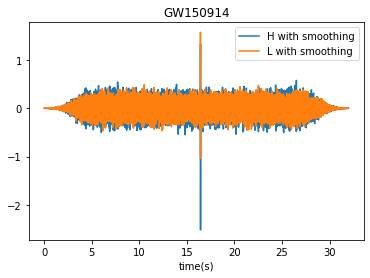

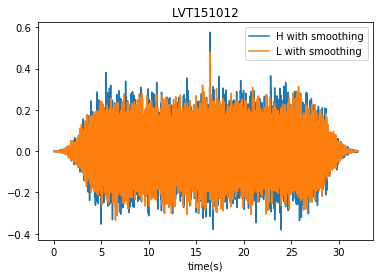

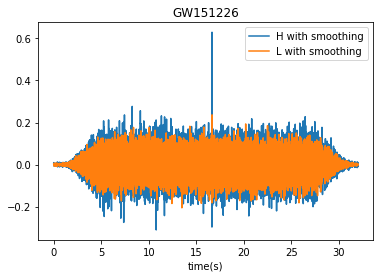

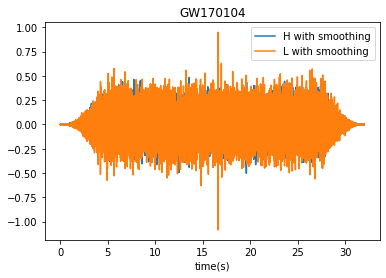

In [452]:
hold_mf_H, hold_mf_L = [],[]
hold_tft_whiteH, hold_tft_whiteL = [],[]
t = np.fft.fftfreq(n, fs)*n
t = t-np.min(t)

for i in range(len(eventnames)):
    sft_H = np.fft.rfft(hold_strain_H[i]*win) # fft(strain H)
    sft_L = np.fft.rfft(hold_strain_L[i]*win) # fft(strain H)

    # whiten strain and template
    sft_whiteH=sft_H/np.sqrt(list_Nft_smoothH[i])
    sft_whiteL=sft_L/np.sqrt(list_Nft_smoothL[i])
    tft_whiteH=np.fft.rfft(hold_t_h[i]*win)/np.sqrt(list_Nft_smoothH[i])
    tft_whiteL=np.fft.rfft(hold_t_l[i]*win)/np.sqrt(list_Nft_smoothL[i])

    # match filter
    hold_mf_H.append(np.fft.irfft(sft_whiteH*np.conj(tft_whiteH)))
    hold_mf_L.append(np.fft.irfft(sft_whiteL*np.conj(tft_whiteL)))
    hold_tft_whiteH.append(tft_whiteH)
    hold_tft_whiteL.append(tft_whiteL)
    
    plt.plot(t,(hold_mf_H[i]),  label ='H with smoothing')
    plt.plot(t,(hold_mf_L[i]),  label ='L with smoothing')
    plt.xlabel('time(s)')
    plt.title(eventnames[i])
    plt.legend()
    plt.show()

## Part C:

Our analytical SNR is calcualted as shown below, where we take the fourier transform of our template and divide by our noise model, this result is then inverse FT'd back to real space for our SNR (analytical) - this is plotted below. The combined SNR from livignston and hanford events were added in quadrature.

The scatter SNR takes the peak of our GW signal (from our MF) and is divided by the standard deviation in our MF data.

$$m  = (A^T N^{-1} d) (A^T N^{-1} A)^{-1}$$

$$ <m m^T> = < (A^T N^{-1} d d^T N^{-1} A)^{-1}>$$

Let $d d^T = N$:
$$ <m m^T> = < (A^T N^{-1} N N^{-1} A)^{-1}>$$
$$ <m m^T> = < (A^T N^{-1} A)^{-1}>$$

### Analytical SNR:

$$ \frac{SNR^2}{mode} = \frac{F(template)^2}{noise PS}$$

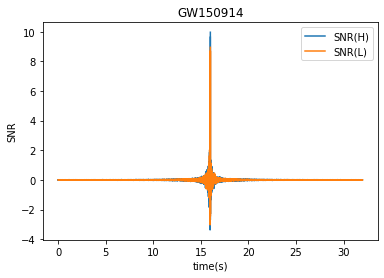

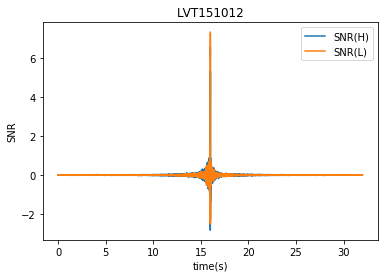

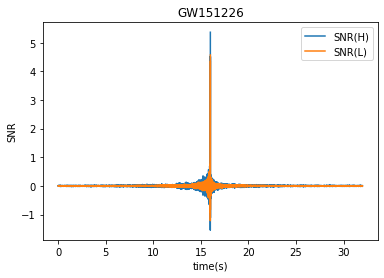

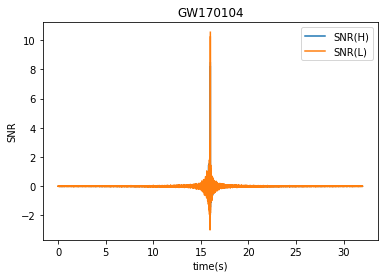

In [453]:
SNR_H , SNR_L = [],[]

for i in range(len(eventnames)):
    SNR_H.append(np.fft.irfft(np.sqrt((np.fft.rfft(hold_t_h[i]*win))**2/list_Nft_smoothH[i])))
    SNR_L.append(np.fft.irfft(np.sqrt((np.fft.rfft(hold_t_l[i]*win))**2/list_Nft_smoothL[i])))

    plt.plot(t,(SNR_H[i]), label = 'SNR(H)')
    plt.plot(t,(SNR_L[i]), label = 'SNR(L)')
    plt.ylabel('SNR')
    plt.xlabel('time(s)')
    plt.legend()
    plt.title(eventnames[i])
    plt.show()

### Scattter SNR and combined SNRs for both:

In [455]:
# Finding SNR from data (Scatter)

for i in range(len(eventnames)):
    print('Event: ', eventnames[i])
    noiseH = np.std(hold_mf_H[i])
    noiseL = np.std(hold_mf_L[i])
    
    
    h_max=np.argmax(abs(hold_mf_H[i])) #finding the location of the wave assuming its the highest piont in the peak
    print('Scatter SNR(H):', max(abs(hold_mf_H[i]))/noiseH)
    print('Scatter SNR(L):', max(abs(hold_mf_L[i]))/noiseL)
    print('Combined SNR(Scatter):', np.sqrt((max(abs(hold_mf_H[i]))/noiseH)**2+(max(abs(hold_mf_L[i]))/noiseL)**2))
    # From above we have analytical SNR:
    print('Analytical SNR(H):', max(abs(SNR_H[i])))
    print('Analytical SNR(L):', max(abs(SNR_L[i])))
    
    print('Combined SNR(Analytical):',np.sqrt((max(abs(SNR_H[i])))**2+(max(abs(SNR_L[i])))**2))
    print('')

Event:  GW150914
Scatter SNR(H): 20.039466584015006
Scatter SNR(L): 14.25639990038321
Combined SNR(Scatter): 24.59319334880081
Analytical SNR(H): 9.963562040694086
Analytical SNR(L): 8.946479585021113
Combined SNR(Analytical): 13.390745517108433

Event:  LVT151012
Scatter SNR(H): 6.988008417927906
Scatter SNR(L): 6.286509577539994
Combined SNR(Scatter): 9.399599157279706
Analytical SNR(H): 6.5777374031845675
Analytical SNR(L): 7.341285899642674
Combined SNR(Analytical): 9.857033428245316

Event:  GW151226
Scatter SNR(H): 11.148083636527632
Scatter SNR(L): 5.779227249620744
Combined SNR(Scatter): 12.557039315450682
Analytical SNR(H): 5.365329148952034
Analytical SNR(L): 4.569241585947504
Combined SNR(Analytical): 7.047320451586292

Event:  GW170104
Scatter SNR(H): 9.087418955400075
Scatter SNR(L): 8.128473891420288
Combined SNR(Scatter): 12.192344773441484
Analytical SNR(H): 8.451124435477706
Analytical SNR(L): 10.549378846681368
Combined SNR(Analytical): 13.517059527676006



## Part D: Compare SNRs from scatter and analytic

  The SNRs are on the same order for the most part and very close for 2 of the 4 events, Event GW150914 and Event GW151226 had a higher scatter SNR than analytical SNR. The discrepancy could be from neglecting the mode term in the SNR equation: 
  $$ \frac{SNR^2}{mode} = \frac{F(template)^2}{noise PS}$$
  
Also, possibly our PSD is high because my noise model isn't great, which would result in a lower analytical SNR   
  


## Part E: Event frequency

- find frequency from each event, half weight from above and below freq
- take max of PSD (fourier transform) - peak corresponds to most prominent frequency signal, take half of that value and finding its respective frequency 
- want cumulative integral from whitened template (i.e. from template and noise model) in frequency space, find frequency equal to 1/2 its maximum value


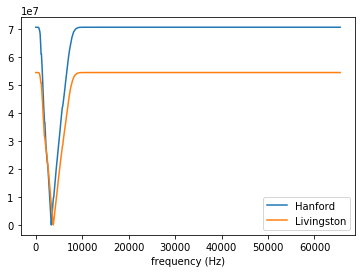

GW150914
Event frequency (H): 104.5625 Hz
Event frequency (L): 117.4375 Hz


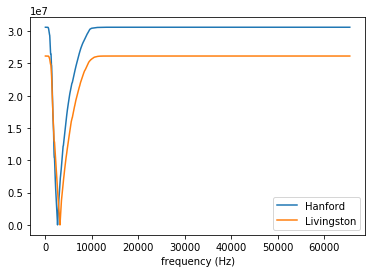

LVT151012
Event frequency (H): 81.6875 Hz
Event frequency (L): 97.96875 Hz


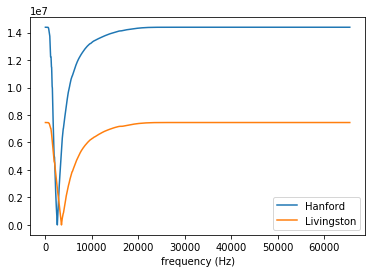

GW151226
Event frequency (H): 80.125 Hz
Event frequency (L): 107.96875 Hz


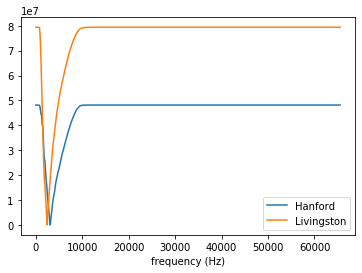

GW170104
Event frequency (H): 96.9375 Hz
Event frequency (L): 76.03125 Hz


In [456]:
# shift fft_freq , fft_freq
for i in range(len(eventnames)):
    # PSD
    psd_H = np.abs(hold_tft_whiteH[i]**2)
    psd_L = np.abs(hold_tft_whiteL[i]**2)

    cum_psd_H = np.cumsum(psd_H)
    cum_psd_L = np.cumsum(psd_L)
    half_maxH = max(cum_psd_H)*0.5
    half_maxL = max(cum_psd_L)*0.5

    # subtract half max for each element in array, so that half above and below frequency 
    # and then absolute valued to find mid point easier
    h = abs(cum_psd_H - np.ones(len(cum_psd_H))*half_maxH)
    l = abs(cum_psd_L - np.ones(len(cum_psd_L))*half_maxL)
    peak_index_h = np.argmin(h)
    peak_index_l = np.argmin(l)
    
    plt.plot(h, label = 'Hanford')
    plt.plot(l, label = 'Livingston')
    plt.xlabel('frequency (Hz)')
    plt.legend()
    plt.show()
    
    print(eventnames[i])
    print('Event frequency (H):' ,fft_freq[peak_index_h], 'Hz')
    print('Event frequency (L):' ,fft_freq[peak_index_l], 'Hz')

## Part F: TIme of event

- localize time of arrival 
- horizontal shift of match filter .. ?
- find peak of match filter events from part B

According to the internet, the detectors are 3002 km away, the GW are travelling at speed of light so 3e8 m/s.

$$ t = \frac{d}{v} \approx \frac{3e6}{3e8} = 10^{-2} s$$

This is the time it takes for the light to travel from the hanford detector to livingston, and can be approximated as the uncertainty in time, $\delta t \sim 0.01 $s 

In [457]:
for i in range(len(eventnames)):
    event_idxH = np.argmax(abs(hold_mf_H[i]))
    event_idxL = np.argmax(abs(hold_mf_L[i]))
    print(eventnames[i])
    print('Time of event (H):',t[event_idxH], 's')
    print('Time of event (L):',t[event_idxL], 's')
    print('time difference between detectors:' , abs(t[event_idxH]-t[event_idxL]), 's')
    print('')

GW150914
Time of event (H): 16.4404296875 s
Time of event (L): 16.431640625 s
time difference between detectors: 0.0087890625 s

LVT151012
Time of event (H): 16.44140625 s
Time of event (L): 16.443359375 s
time difference between detectors: 0.001953125 s

GW151226
Time of event (H): 16.647705078125 s
Time of event (L): 16.648193359375 s
time difference between detectors: 0.00048828125 s

GW170104
Time of event (H): 16.60791015625 s
Time of event (L): 16.61279296875 s
time difference between detectors: 0.0048828125 s

